In [ ]:
from bs4 import BeautifulSoup as soup
import pandas as pd


with open('index.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

webpage = soup(html_content, 'html.parser')

def obtenerTexto(elementos):
    listado = []
    for i in elementos:
      listado.append(i.getText())
    return listado



fechas = []
estadios = []
lugares = []
teloneros = []

fechas = webpage.find_all('p', class_='fecha')
estadios = webpage.find_all('p', class_='estadio')
lugares = webpage.find_all('p', class_='lugar')
teloneros = webpage.find_all('p', class_='telonero')

diccionario={}
diccionario["fecha"] = obtenerTexto(fechas)
diccionario["estadio"] = obtenerTexto(estadios)
diccionario["teloneros"] = obtenerTexto(teloneros)
diccionario["lugar"] = obtenerTexto(lugares)

data = pd.DataFrame(diccionario)
data.to_csv("TheErasTour.csv")

#Limpieza: pasamos a minusculas todo y limpiamos la linea de los teloneros

def eliminarWith(lista):
  for i in range(len(lista)):
    lista[i]=str(lista[i]).replace("with", "")




data = data.applymap(lambda x: x.lower() if isinstance(x, str) else x)
data['teloneros'] = data['teloneros'].str.replace('with', '')


data.to_csv('TheErasLimpieza.csv')






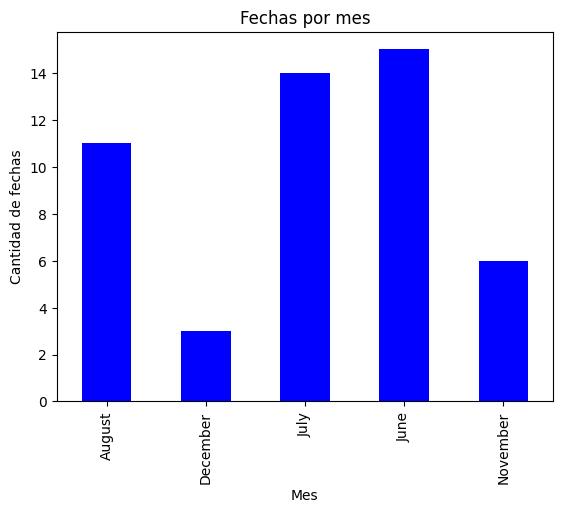

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('TheErasLimpieza.csv')


data['fecha'] = pd.to_datetime(data['fecha'])


data['mes'] = data['fecha'].dt.month_name()
eventos_por_mes = data['mes'].value_counts().sort_index()
eventos_por_mes.plot(kind='bar', color='blue')
plt.title('Fechas por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de fechas')
plt.show()

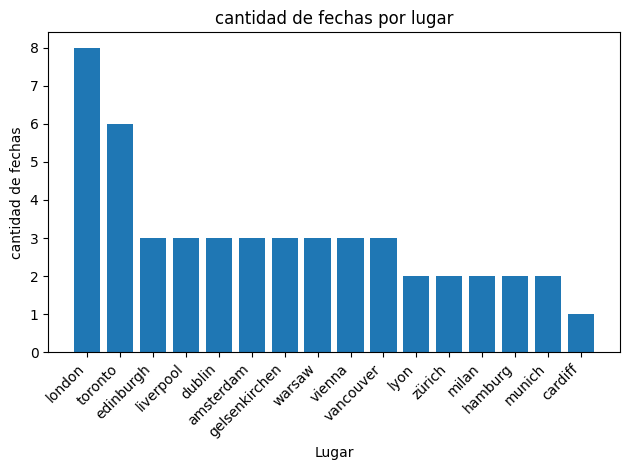

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('TheErasLimpieza.csv')


location_counts = df['lugar'].value_counts()


plt.bar(location_counts.index, location_counts.values)
plt.xlabel('Lugar')
plt.ylabel('cantidad de fechas')
plt.title('cantidad de fechas por lugar')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

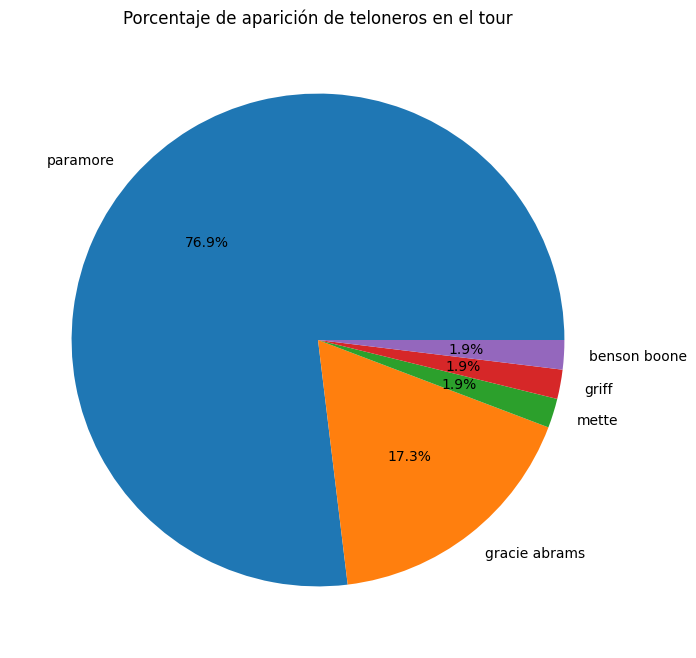

In [19]:
import pandas as pd
import matplotlib.pyplot as plt


csv = pd.read_csv('TheErasLimpieza.csv')

teloneros_list = csv['teloneros'].str.split(',')
teloneros_flat_list = [item.strip() for sublist in teloneros_list for item in sublist]

teloneros_counts = pd.Series(teloneros_flat_list).value_counts()

plt.figure(figsize=(8, 8))
plt.pie(teloneros_counts, labels=teloneros_counts.index, autopct='%1.1f%%')
plt.title('Porcentaje de aparición de teloneros en el tour')

plt.show()

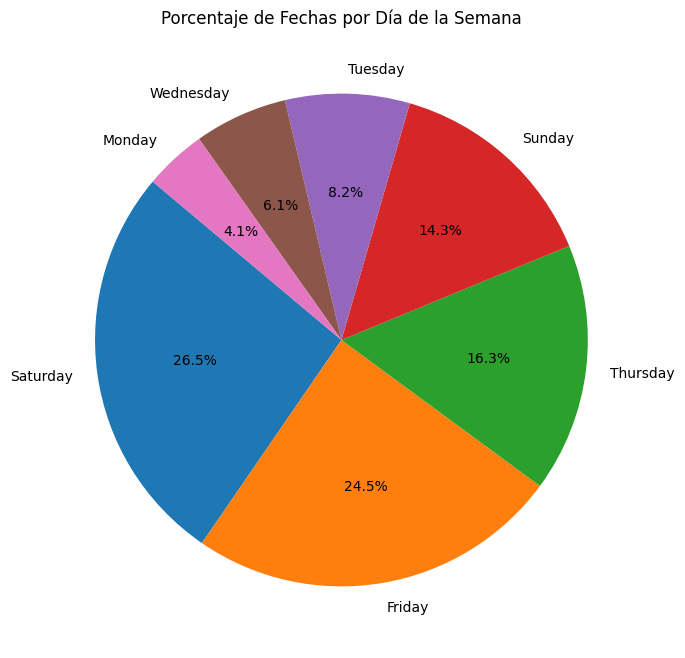

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("TheErasLimpieza.csv")
df['fecha'] = pd.to_datetime(df['fecha'], format='%a, %b %d, %Y')
df['dia_semana'] = df['fecha'].dt.day_name()
fechas_por_dia = df['dia_semana'].value_counts()
porcentaje_por_dia = (fechas_por_dia / fechas_por_dia.sum()) * 100
plt.figure(figsize=(8, 8))
porcentaje_por_dia.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de Fechas por Día de la Semana')
plt.ylabel('')
plt.show()

Como análisis de los datos que obtuvimos podemos decir que:

Los días que más se realizan recitales son los sábados y viernes, ya que también son los días en que la gente se encuentra más disponible para concurrir.


The eras tour tuvo la mayor cantidad de fechas para Londres, 8 fechas en total. Junto con Toronto, el segundo lugar con mas fechas, hay una notoria diferencia con respecto a las demás. Con esto se puede llegar a la conclusión de que las fechas son en gran parte en Europa.

The eras tour tuvo mas fechas en junio y julio, con solo la diferencia de cantidad de 1 fecha, siendo junio el mes con mayor cantidad.

The Eras Tour tuvo una mayor participación como telonero el artista Paramore. Con una amplia diferencia con respecto a los demás artistas.